# The Living Standard Analysis of the Top 50 Cities in GDP

Ruixuan Han
March 14, 2021
## 1.	Introduction
### 1.1	Background
With China's economic development, more and more people choose overseas investment and immigration. In recent years, due to the rapid increase in the number of Chinese immigration applicants, some popular countries have raised immigration thresholds and tightened immigration policies. As more and more countries launch projects to attract immigrants, the destinations of overseas Chinese immigrants will become more diversified, including some South American and African countries, which will gradually enter people's field of vision. The experience of living in many new countries and cities is very scarce, and the cost may also very high. Therefore, it is particularly important to obtain some suggestions based on data science.
### 1.2	Problem
Cities with larger GDP will generally have greater economic opportunities and higher standards of living, which is the first important factor for immigration that should be considered. In this project, the living standard of analysis of the top 50 cities in GDP was chosen to compare and cluster. Through the collection of living environment data in the entertainment, nature, sports, historical attractions, and culture, the world's most beautiful and historical cities will be selected. Through the GDP and population data analyze, the cities with high living standard were selected. The result can provide references for those planning to emigrate.
### 1.3	 Interest
The main audience of this project should be the individuals planning to immigrate or relocate abroad and immigration agencies. The results may also interest the individuals and companies planning to invest, cooperate or travel internationally.

## 2.	Data 
### 2.1	Data sources

For this project, the following data were used:
*	World Cities Database (Basic update in 2020).Data source: [World-Cities](https://simplemaps.com/data/world-cities)
*	150 richest cities in the world by GDP in 2020. Data source: [150 Richest Cities](http://www.citymayors.com/statistics/richest-cities-2020.html)
*   Fousquare API was used to get 100 venues in each city.




### 2.2	Data cleaning
The data of World Cities Database was downloaded from the website and then upload to the GitHub repository. scrab read the CSV data from the GitHub repository. 

In [1]:
import pandas as pd

Citylist = pd.read_csv('https://raw.githubusercontent.com/Ruixuanhan/Coursera_Capstone1/master/worldcities.csv')
Citylist.head()


Scrape the data of the 150 richest cities in the world by GDP in 2020 from the website. 

In [3]:
# Webpage url                                                                                                               
url = 'http://www.citymayors.com/statistics/richest-cities-2020.html'

# Extract tables
dfs = pd.read_html(url)

# Get first table                                                                                                           
df = dfs[2]
df.columns = ['Rank','City','Country','GDP','Est annual growth 2005-2020%']
df=df.drop([0])
df.shape
df.head()

,Rank,City,Country,GDP,Est annual growth 2005-2020%
1,1,Tokyo,Japan,1602,2.0%
2,2,New York,USA,1561,2.2%
3,3,Los Angeles,USA,886,2.2%
4,4,London,UK,708,3.0%
5,5,Chicago,USA,645,2.3%


Choose the top 50 cities. Modify the city names in the top 50 GDP city dataframe to match the city name in the World Cities Database.

In [4]:
df=df.head(50)
df=df.replace({'City': {"Osaka/Kobe": 'Osaka', "Washington DC": "Washington",
                        "Dallas/Fort Worth":"Dallas","San Francisco/Oakland":"San Francisco",
                        'Metro Manila':"Manila"}})
df=df.replace({'Country':{'Canada180':'Canada'}})             
df.head()


,Rank,City,Country,GDP,Est annual growth 2005-2020%
1,1,Tokyo,Japan,1602,2.0%
2,2,New York,USA,1561,2.2%
3,3,Los Angeles,USA,886,2.2%
4,4,London,UK,708,3.0%
5,5,Chicago,USA,645,2.3%


Changed the data types of GDP and Est annual growth 2005-2020% from string to float.

In [5]:
df.dtypes

Rank                            object
City                            object
Country                         object
GDP                             object
Est annual growth 2005-2020%    object
dtype: object

In [6]:
df = df.replace(to_replace='%', value='', regex=True)
df=df.astype({'GDP': 'float','Est annual growth 2005-2020%': 'float'})

Merge the two dataframe by City names

In [7]:
city_merged = df.join(Citylist.set_index(['city_ascii']), on=['City'])
city_merged.shape

(92, 15)

In [8]:
City_data1=city_merged[['City','Country','lat','lng',"GDP","population","Est annual growth 2005-2020%"]]
City_data1.head()

,City,Country,lat,lng,GDP,population,Est annual growth 2005-2020%
1,Tokyo,Japan,35.6897,139.6922,1602.0,37977000.0,2.0
2,New York,USA,40.6943,-73.9249,1561.0,18713220.0,2.2
3,Los Angeles,USA,34.1139,-118.4068,886.0,12750807.0,2.2
3,Los Angeles,USA,-37.4707,-72.3517,886.0,218000.0,2.2
4,London,UK,51.5072,-0.1275,708.0,10979000.0,3.0


Remove the duplicated city data.

In [9]:
City_data=City_data1.drop_duplicates(subset=['City'])
City_data.shape

(50, 7)

In [10]:
City_data

,City,Country,lat,lng,GDP,population,Est annual growth 2005-2020%
1,Tokyo,Japan,35.6897,139.6922,1602.0,37977000.0,2.0
2,New York,USA,40.6943,-73.9249,1561.0,18713220.0,2.2
3,Los Angeles,USA,34.1139,-118.4068,886.0,12750807.0,2.2
4,London,UK,51.5072,-0.1275,708.0,10979000.0,3.0
5,Chicago,USA,41.8373,-87.6862,645.0,8604203.0,2.3
6,Paris,France,48.8566,2.3522,611.0,11020000.0,1.9
7,Mexico City,Mexico,19.4333,-99.1333,608.0,20996000.0,4.5
8,Philadelphia,USA,40.0077,-75.1339,440.0,5649300.0,2.3
9,Osaka,Japan,34.6936,135.5019,430.0,14977000.0,1.6
10,Washington,USA,38.9047,-77.0163,426.0,5379184.0,2.4


In [12]:
!conda install -c conda-forge geopy --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\c6h5o\anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following package

In [13]:
from geopy.geocoders import Nominatim

Get the Cairo's coordinate as the center of the wolrd map.

In [14]:
address = 'Cairo'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cairo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cairo are 30.0443879, 31.2357257.


Python folium library was used to visualize geographic distribution of the 50 cities in the world. 

In [15]:
! pip install folium

In [16]:
import folium

In [17]:
map_Cairo = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map
for lat, lng, city, country in zip(City_data['lat'], City_data['lng'],
                                           City_data['City'], City_data['Country']):
    label = '{}, {}'.format(city, country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Cairo)  
    
map_Cairo

In [123]:
City_data.groupby('Country').count().sort_values(by='City',ascending=False).reset_index()

,Country,City,lat,lng,GDP,population,Est annual growth 2005-2020%
0,USA,17,17,17,17,17,17
1,China,4,4,4,4,4,4
2,India,3,3,3,3,3,3
3,Spain,2,2,2,2,2,2
4,Australia,2,2,2,2,2,2
5,Italy,2,2,2,2,2,2
6,Japan,2,2,2,2,2,2
7,Canada,2,2,2,2,2,2
8,Brazil,2,2,2,2,2,2
9,France,1,1,1,1,1,1


The Foursquare API were utilized to explore the cities. I designed the limit as 100 venue and the radius 50km for each city from their given latitude and longitude information. 

In [19]:
CLIENT_ID = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 

In [20]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests
import numpy as np # library to handle data in a vectorized mannel
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=50000):   
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'lat', 
                  'lng', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
city_venues = getNearbyVenues(names=City_data['City'],
                                   latitudes=City_data['lat'],
                                   longitudes=City_data['lng'])
print(city_venues.shape)
city_venues.head()

Tokyo
New York
Los Angeles
London
Chicago
Paris
Mexico City
Philadelphia
Osaka
Washington
Buenos Aires
Boston
Sao Paulo
Hong Kong
Dallas
Shanghai
Seoul
Atlanta
San Francisco
Houston
Miami
Toronto
Moscow
Mumbai
Madrid
Detroit
Istanbul
Seattle
Beijing
Manila
Rio de Janeiro
Sydney
Jakarta
Delhi
Phoenix
Guangzhou
Minneapolis
Kolkata
San Diego
Singapore
Cairo
Barcelona
Melbourne
Denver
Rome
Bangkok
Montreal
Milan
Tehran
Riyadh
(4991, 7)


,city,lat,lng,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tokyo,35.6897,139.6922,Park Hyatt Tokyo (パークハイアット東京),35.685575,139.690639,Hotel
1,Tokyo,35.6897,139.6922,BERG,35.691945,139.701082,Pub
2,Tokyo,35.6897,139.6922,Ohitsuzen Tanbo (おひつ膳 田んぼ),35.682386,139.699894,Japanese Restaurant
3,Tokyo,35.6897,139.6922,Shinjuku Gyoen (新宿御苑),35.685268,139.709528,Garden
4,Tokyo,35.6897,139.6922,Anshin Oyado (安心お宿 新宿駅前店),35.689432,139.702708,Bed & Breakfast


Check the venuesnumber returned by Foursquare

In [23]:
venuesnumber=city_venues.groupby('city').count().sort_values(by='Venue',ascending=False).reset_index()
venuesnumber

,city,lat,lng,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Atlanta,100,100,100,100,100,100
1,Rome,100,100,100,100,100,100
2,Montreal,100,100,100,100,100,100
3,Moscow,100,100,100,100,100,100
4,Mumbai,100,100,100,100,100,100
5,New York,100,100,100,100,100,100
6,Osaka,100,100,100,100,100,100
7,Paris,100,100,100,100,100,100
8,Philadelphia,100,100,100,100,100,100
9,Phoenix,100,100,100,100,100,100


Check the unique categories returned by Foursquare.

In [24]:
city_venues['Venue Category'].unique()

array(['Hotel', 'Pub', 'Japanese Restaurant', 'Garden', 'Bed & Breakfast',
       'Shrine', 'Kushikatsu Restaurant', 'Beer Bar', 'Sake Bar',
       'Vietnamese Restaurant', 'Italian Restaurant', 'Coffee Shop',
       'Bakery', 'Park', 'Spanish Restaurant',
       'Japanese Curry Restaurant', 'Wagashi Place', 'Dessert Shop',
       'Concert Hall', 'Bookstore', 'Seafood Restaurant', 'Burger Joint',
       'Jazz Club', 'Liquor Store', 'Bar', 'Chinese Restaurant',
       'Art Museum', 'BBQ Joint', 'Planetarium', 'Art Gallery',
       'Tonkatsu Restaurant', 'Soba Restaurant', 'Kaiseki Restaurant',
       'Tempura Restaurant', 'Cocktail Bar', 'French Restaurant',
       'Roof Deck', 'Bath House', 'Shopping Mall', 'Sushi Restaurant',
       'Comedy Club', 'Thai Restaurant', 'Yakitori Restaurant',
       'Indian Restaurant', 'Movie Theater', 'Deli / Bodega',
       'Pizza Place', 'Udon Restaurant', 'Monument / Landmark',
       'Ramen Restaurant', 'Teishoku Restaurant', 'Multiplex',
       'Ko

In [25]:
print('There are {} uniques categories.'.format(len(city_venues['Venue Category'].unique())))

There are 405 uniques categories.


Group the living enviroment categories into 6 groups.

In [26]:
# we can group some categories together to make a better categorical variable

Art = ['Jazz Club','Art Museum','Art Gallery','Performing Arts Venue','Music Venue', 'Sculpture Garden',
       'Street Art','Public Art','Outdoor Sculpture', 'Concert Hall', 'Comedy Club',
       'Dance Studio', 'Country Dance Club']
Entertainment =[ 'Indie Theater','Theater','Movie Theater','General Entertainment',
                'Playground', 'Indie Movie Theater','Opera House','Theme Park Ride / Attraction', 
                'Theme Park','Resort','Pedestrian Plaza']
Nature =[ 'Trail',  'National Park',  'Forest', 'Reservoir', 'Boat or Ferry', 'Hot Spring',
         'Bay', 'Garden','Park','Scenic Lookout','Cricket Ground','Beach','Mountain','Island', 'Fountain',
         'Zoo Exhibit','Water Park','Zoo','State / Provincial Park','Pier', 'Nature Preserve','Lake',
         'Botanical Garden','Waterfront','Other Great Outdoors','Outdoor Event Space']
Historic =['Historic Site', 'Monument / Landmark','History Museum','Palace','Bridge',
           'Shrine', 'Mosque', 'Pelmeni House']
Sport = [ 'Racetrack', 'Rock Climbing Spot', 'Soccer Field', 'Baseball Stadium','Squash Court',
         'Athletics & Sports','Basketball Court','Pool','Sports Club','Soccer Stadium','Climbing Gym',
         'Tennis Court','Golf Course','Dive Bar']
Cultural =[ 'Bookstore', 'Planetarium', 'Museum', 'Science Museum', 'Aquarium','Church','Cultural Center',
           'Spiritual Center','Beer Garden', 'Temple','Buddhist Temple','Library','Martial Arts School']

def conditions(s):
    if s['Venue Category'] in Art:
        return 'Art'
    if s['Venue Category'] in Entertainment:
        return 'Entertainment'
    if s['Venue Category'] in Nature:
        return 'Nature'
    if s['Venue Category'] in Historic:
        return 'Historic'
    if s['Venue Category'] in Sport:
        return 'Sport'
    if s['Venue Category'] in Cultural:
        return 'Cultural'

city_venues['categories_classified'] = city_venues.apply(conditions, axis=1)
city_venues.head(5)

,city,lat,lng,Venue,Venue Latitude,Venue Longitude,Venue Category,categories_classified
0,Tokyo,35.6897,139.6922,Park Hyatt Tokyo (パークハイアット東京),35.685575,139.690639,Hotel,None
1,Tokyo,35.6897,139.6922,BERG,35.691945,139.701082,Pub,None
2,Tokyo,35.6897,139.6922,Ohitsuzen Tanbo (おひつ膳 田んぼ),35.682386,139.699894,Japanese Restaurant,None
3,Tokyo,35.6897,139.6922,Shinjuku Gyoen (新宿御苑),35.685268,139.709528,Garden,Nature
4,Tokyo,35.6897,139.6922,Anshin Oyado (安心お宿 新宿駅前店),35.689432,139.702708,Bed & Breakfast,None


In [27]:
print('There are {} categories in Art.'.format(len(Art)))
print('There are {} categories in Entertainment.'.format(len(Entertainment)))
print('There are {} categories in Nature.'.format(len(Nature)))
print('There are {} categories in Historic.'.format(len(Historic)))
print('There are {} categories in Sport.'.format(len(Sport)))
print('There are {} categories in Cultural.'.format(len(Cultural)))
print('There are {} categories in Total.'.format(len(Art+Entertainment+Nature+Historic+Sport+Cultural)))

There are 13 categories in Art.
There are 11 categories in Entertainment.
There are 26 categories in Nature.
There are 8 categories in Historic.
There are 14 categories in Sport.
There are 13 categories in Cultural.
There are 85 categories in Total.


In [28]:
city_venues1=city_venues.dropna(subset=['categories_classified'])
print('There are {} uniques categories.'.format(len(city_venues1['Venue Category'].unique())))
city_venues1.shape


There are 85 uniques categories.


(1319, 8)

In [29]:
city_venues1.head(5)

,city,lat,lng,Venue,Venue Latitude,Venue Longitude,Venue Category,categories_classified
3,Tokyo,35.6897,139.6922,Shinjuku Gyoen (新宿御苑),35.685268,139.709528,Garden,Nature
5,Tokyo,35.6897,139.6922,Meiji Jingu Shrine (明治神宮),35.676372,139.699359,Shrine,Historic
13,Tokyo,35.6897,139.6922,Yoyogi Park (代々木公園),35.670437,139.695671,Park,Nature
14,Tokyo,35.6897,139.6922,Meiji Jingu Gyoen (明治神宮御苑),35.673782,139.700319,Garden,Nature
20,Tokyo,35.6897,139.6922,LINE CUBE SHIBUYA,35.664100,139.698520,Concert Hall,Art


In [30]:
# double check to make sure categories_classified has been created correctly

categories_list = pd.crosstab(index = city_venues1["categories_classified"],columns="count")
categories_list =categories_list.sort_values(by='count',ascending=False)
categories_list

col_0,count
categories_classified,
Nature,547
Art,226
Historic,168
Cultural,158
Entertainment,157
Sport,63


In [31]:
city_onehot = pd.get_dummies(city_venues1[['categories_classified']], prefix="", prefix_sep="")

# add city column back to dataframe
city_onehot['city'] = city_venues['city'] 

# move city column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

print(city_onehot.shape)
city_onehot.head()

(1319, 7)


,city,Art,Cultural,Entertainment,Historic,Nature,Sport
3,Tokyo,0,0,0,0,1,0
5,Tokyo,0,0,0,1,0,0
13,Tokyo,0,0,0,0,1,0
14,Tokyo,0,0,0,0,1,0
20,Tokyo,1,0,0,0,0,0


In [32]:
import numpy as np

In [33]:
city_grouped = city_onehot.groupby('city').sum().reset_index()
print(city_grouped.shape)
city_grouped.head()

(50, 7)


,city,Art,Cultural,Entertainment,Historic,Nature,Sport
0,Atlanta,3,2,2,4,16,0
1,Bangkok,1,5,1,4,4,1
2,Barcelona,3,6,3,4,7,0
3,Beijing,4,4,1,16,9,0
4,Boston,5,5,2,1,12,2


## 3 Data analyze
Run k-means to cluster the neighborhood into 4 clusters.

In [34]:
city_group_clustering = city_grouped.drop(['city'], 1)

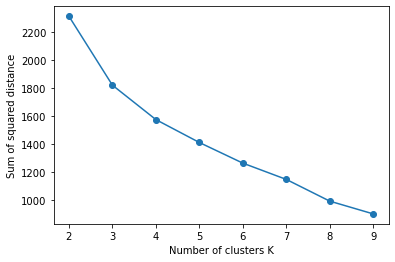

In [36]:
## Finding the optimal K using elbow method
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
sscr =[]
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0).fit(city_group_clustering)
    sse.append(km.inertia_)
    sscr.append(silhouette_score(city_group_clustering, km.labels_, metric='euclidean'))

plt.figure(figsize=(6, 4))
plt.plot(list_k, sse, '-o',label='sse')
plt.xlabel(r'Number of clusters K')
plt.ylabel('Sum of squared distance');


In [37]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_group_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3, 0, 0, 0, 2, 1, 1, 0, 0, 3, 1,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 1, 2, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 3, 0, 3])

In [38]:
# add clustering labels
city_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [39]:
city_grouped.sort_values(by='Cluster Labels',ascending=False).reset_index()

,index,Cluster Labels,city,Art,Cultural,Entertainment,Historic,Nature,Sport
0,25,3,Milan,5,5,1,6,8,0
1,20,3,Madrid,8,2,5,5,3,0
2,47,3,Tokyo,9,3,1,3,5,0
3,43,3,Shanghai,4,0,3,0,7,0
4,40,3,Sao Paulo,8,6,3,1,3,3
5,34,3,Phoenix,2,4,5,0,8,1
6,31,3,Osaka,2,2,13,3,10,3
7,29,3,Mumbai,2,0,4,2,9,1
8,26,3,Minneapolis,3,2,4,2,10,0
9,24,3,Miami,7,2,2,0,12,0


Gouped the cityes by Cluster Labels

In [40]:
city_groupeded = city_grouped.groupby('Cluster Labels').mean().reset_index()
city_groupeded

,Cluster Labels,Art,Cultural,Entertainment,Historic,Nature,Sport
0,0,5.000000,3.300000,3.600000,2.650000,16.900000,1.350000
1,1,1.285714,2.000000,1.285714,3.285714,2.571429,2.285714
2,2,6.666667,5.666667,2.000000,15.333333,8.666667,2.000000
3,3,4.850000,3.050000,3.500000,2.300000,8.250000,0.700000


Created a bar chart to help to find proper labels for each cluster.

In [41]:
city_groupeded2=city_groupeded.drop(['Cluster Labels'], 1)

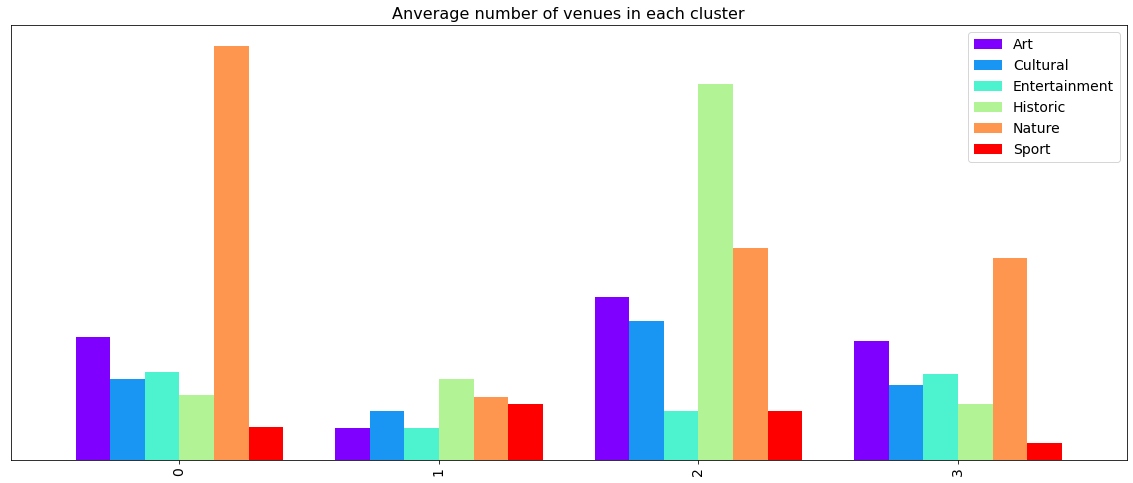

In [42]:
import matplotlib.pyplot as plt
# set color scheme 
A = np.arange(6)
ys = [i + A + (i*A)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
ax = city_groupeded2.plot(kind='bar',figsize=(20,8),width = 0.8,color = rainbow,edgecolor=None)
plt.legend(labels=city_groupeded2.columns,fontsize= 14)
plt.xticks(fontsize=14)
ax.set_title("Anverage number of venues in each cluster",fontsize= 16)
plt.yticks([])
ax.xaxis.set_ticks_position('bottom')

Count the city numbers in each cluster.

In [43]:
city_grouped.groupby('Cluster Labels').count().reset_index()

,Cluster Labels,city,Art,Cultural,Entertainment,Historic,Nature,Sport
0,0,20,20,20,20,20,20,20
1,1,7,7,7,7,7,7,7
2,2,3,3,3,3,3,3,3
3,3,20,20,20,20,20,20,20


In [74]:
# merge to get the master data set.
city_merged = City_data.join(city_grouped.set_index('city'), on='City')
city_merged

,City,Country,lat,lng,GDP,population,Est annual growth 2005-2020%,Cluster Labels,Art,Cultural,Entertainment,Historic,Nature,Sport
1,Tokyo,Japan,35.6897,139.6922,1602.0,37977000.0,2.0,3,9,3,1,3,5,0
2,New York,USA,40.6943,-73.9249,1561.0,18713220.0,2.2,0,6,4,6,1,15,3
3,Los Angeles,USA,34.1139,-118.4068,886.0,12750807.0,2.2,0,5,0,3,0,20,2
4,London,UK,51.5072,-0.1275,708.0,10979000.0,3.0,0,9,3,4,3,16,0
5,Chicago,USA,41.8373,-87.6862,645.0,8604203.0,2.3,3,4,1,2,2,12,0
6,Paris,France,48.8566,2.3522,611.0,11020000.0,1.9,0,9,5,3,6,15,0
7,Mexico City,Mexico,19.4333,-99.1333,608.0,20996000.0,4.5,3,7,5,1,2,7,1
8,Philadelphia,USA,40.0077,-75.1339,440.0,5649300.0,2.3,0,6,3,2,3,14,0
9,Osaka,Japan,34.6936,135.5019,430.0,14977000.0,1.6,3,2,2,13,3,10,3
10,Washington,USA,38.9047,-77.0163,426.0,5379184.0,2.4,3,7,3,2,7,11,1


Visualize the geographic distribution of the 4 clusters of the living environment data.

In [126]:
map_clusters = folium.Map(location=[latitude, longitude],zoom_start=2)
k=4
# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, city, cluster in zip(city_merged['lat'], city_merged['lng'],
                                            city_merged['City'], city_merged['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],

        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Choose the data of "GDP","population","Est annual growth 2005-2020%"

In [47]:
City_data2=City_data[["GDP","population","Est annual growth 2005-2020%"]]
City_data2.head()

,GDP,population,Est annual growth 2005-2020%
1,1602.0,37977000.0,2.0
2,1561.0,18713220.0,2.2
3,886.0,12750807.0,2.2
4,708.0,10979000.0,3.0
5,645.0,8604203.0,2.3


Normalize the data by the Min-Max Normalization

In [48]:
from sklearn import preprocessing
x = City_data2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
City_data2 = pd.DataFrame(x_scaled)
City_data2.columns = ["GDP","population","Est annual growth 2005-2020%"]
City_data2.head()

,GDP,population,Est annual growth 2005-2020%
0,1.000000,1.000000,0.075472
1,0.971429,0.474033,0.113208
2,0.501045,0.311238,0.113208
3,0.377003,0.262862,0.264151
4,0.333101,0.198022,0.132075


Cluster the GDP data by K-mean

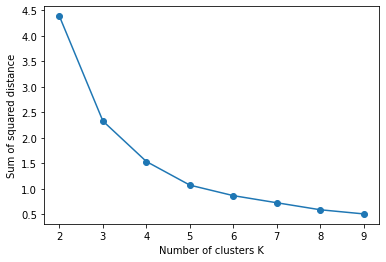

In [49]:
## Finding the optimal K using elbow method
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
sscr =[]
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0).fit(City_data2)
    sse.append(km.inertia_)
    sscr.append(silhouette_score(City_data2, km.labels_, metric='euclidean'))

plt.figure(figsize=(6, 4))
plt.plot(list_k, sse, '-o',label='sse')
plt.xlabel(r'Number of clusters K')
plt.ylabel('Sum of squared distance');


In [50]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(City_data2)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_

array([3, 3, 0, 0, 0, 0, 4, 2, 0, 2, 4, 2, 4, 2, 2, 1, 4, 2, 2, 2, 2, 2,
       4, 1, 2, 2, 4, 2, 1, 1, 4, 2, 1, 1, 2, 1, 2, 1, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 4, 4])

In [85]:
City_data3=City_data[['lat','lng',"City","GDP","population","Est annual growth 2005-2020%"]]
City_data3.insert(0, 'GDP Cluster Labels', kmeans2.labels_)

In [53]:
City_data2.insert(0, 'GDP Cluster Labels', kmeans2.labels_)

In [86]:
City_data3.sort_values(by='GDP Cluster Labels',ascending=False).reset_index()

,index,GDP Cluster Labels,lat,lng,City,GDP,population,Est annual growth 2005-2020%
0,50,4,24.6500,46.7100,Riyadh,167.0,6881000.0,5.0
1,13,4,-23.5504,-46.6339,Sao Paulo,411.0,22046000.0,4.1
2,49,4,35.7000,51.4167,Tehran,172.0,13633000.0,4.5
3,46,4,13.7500,100.5167,Bangkok,180.0,17066000.0,4.8
4,41,4,30.0561,31.2394,Cairo,212.0,19372000.0,5.3
5,31,4,-22.9083,-43.1964,Rio de Janeiro,256.0,12272000.0,4.1
6,7,4,19.4333,-99.1333,Mexico City,608.0,20996000.0,4.5
7,27,4,41.0100,28.9603,Istanbul,287.0,15154000.0,5.2
8,23,4,55.7558,37.6178,Moscow,325.0,17125000.0,4.0
9,11,4,-34.5997,-58.3819,Buenos Aires,416.0,16157000.0,3.6


Visualize the geographic distribution of the 5 clusters of the GDP data.

In [89]:
map_clusters = folium.Map(location=[latitude, longitude],zoom_start=2)
k=5
# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, city, cluster in zip(City_data3['lat'], City_data3['lng'],
                                            City_data3['City'], City_data3['GDP Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],

        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [55]:
city_groupeded3 = City_data2.groupby('GDP Cluster Labels').mean().reset_index()
city_groupeded3

,GDP Cluster Labels,GDP,population,Est annual growth 2005-2020%
0,0,0.340767,0.281625,0.113208
1,1,0.067334,0.613653,0.889151
2,2,0.083769,0.085407,0.198899
3,3,0.985714,0.737016,0.094340
4,4,0.097941,0.416076,0.526587


In [90]:
City_data2.groupby('GDP Cluster Labels').count().reset_index()

,GDP Cluster Labels,GDP,population,Est annual growth 2005-2020%
0,0,5,5,5
1,1,8,8,8
2,2,24,24,24
3,3,2,2,2
4,4,11,11,11


Created a bar chart to help to find proper labels for each cluster.

In [57]:
city_groupeded3=city_groupeded3.drop(['GDP Cluster Labels'], 1)

colors_list = ['#5cb85c','#5bc0de','#d9534f']
ax = city_groupeded3.plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=city_groupeded3.columns,fontsize= 14)
plt.xticks(fontsize=14)
ax.set_title("Anverage number of GDP,population and growth rate in each cluster",fontsize= 16)
plt.yticks([])
ax.xaxis.set_ticks_position('bottom')

In [87]:
city_merged2 = City_data3.join(city_grouped.set_index('city'), on='City')

city_merged2

,GDP Cluster Labels,lat,lng,City,GDP,population,Est annual growth 2005-2020%,Cluster Labels,Art,Cultural,Entertainment,Historic,Nature,Sport
1,3,35.6897,139.6922,Tokyo,1602.0,37977000.0,2.0,3,9,3,1,3,5,0
2,3,40.6943,-73.9249,New York,1561.0,18713220.0,2.2,0,6,4,6,1,15,3
3,0,34.1139,-118.4068,Los Angeles,886.0,12750807.0,2.2,0,5,0,3,0,20,2
4,0,51.5072,-0.1275,London,708.0,10979000.0,3.0,0,9,3,4,3,16,0
5,0,41.8373,-87.6862,Chicago,645.0,8604203.0,2.3,3,4,1,2,2,12,0
6,0,48.8566,2.3522,Paris,611.0,11020000.0,1.9,0,9,5,3,6,15,0
7,4,19.4333,-99.1333,Mexico City,608.0,20996000.0,4.5,3,7,5,1,2,7,1
8,2,40.0077,-75.1339,Philadelphia,440.0,5649300.0,2.3,0,6,3,2,3,14,0
9,0,34.6936,135.5019,Osaka,430.0,14977000.0,1.6,3,2,2,13,3,10,3
10,2,38.9047,-77.0163,Washington,426.0,5379184.0,2.4,3,7,3,2,7,11,1


Select the recomend cities which belong to living environment cluster 0,2 and GDP cluster 0,3,2. 

In [119]:
city_Recomend=city_merged2[city_merged2["Cluster Labels"].isin([0, 2])]
city_Recomend=city_Recomend[city_Recomend["GDP Cluster Labels"].isin([0,3,2])].reset_index()
city_Recomend

,index,GDP Cluster Labels,lat,lng,City,GDP,population,Est annual growth 2005-2020%,Cluster Labels,Art,Cultural,Entertainment,Historic,Nature,Sport
0,2,3,40.6943,-73.9249,New York,1561.0,18713220.0,2.2,0,6,4,6,1,15,3
1,3,0,34.1139,-118.4068,Los Angeles,886.0,12750807.0,2.2,0,5,0,3,0,20,2
2,4,0,51.5072,-0.1275,London,708.0,10979000.0,3.0,0,9,3,4,3,16,0
3,6,0,48.8566,2.3522,Paris,611.0,11020000.0,1.9,0,9,5,3,6,15,0
4,8,2,40.0077,-75.1339,Philadelphia,440.0,5649300.0,2.3,0,6,3,2,3,14,0
5,14,2,22.3050,114.1850,Hong Kong,407.0,7347000.0,3.5,0,2,2,0,0,15,1
6,18,2,33.7627,-84.4224,Atlanta,347.0,5449398.0,2.6,0,3,2,2,4,16,0
7,19,2,37.7562,-122.4430,San Francisco,346.0,3592294.0,2.4,0,8,5,2,0,21,2
8,20,2,29.7863,-95.3889,Houston,339.0,5464251.0,2.5,0,6,4,3,0,16,3
9,22,2,43.7417,-79.3733,Toronto,327.0,5429524.0,3.0,0,2,0,2,2,18,0


 Visualize the 16 Cities in the world map.

In [121]:
map_Cairo = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map
for lat, lng, city, in zip(city_Recomend['lat'], city_Recomend['lng'],
                                           city_Recomend['City']):
    label = '{}, {}'.format(city, country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Cairo)  
    
map_Cairo

## Conclusion
In this project, the living standard of analysis of the top 50 cities in GDP was chosen to compare and cluster. Through the collection of living environment data in the entertainment, nature, sports, historical attractions, and culture, 20 most beautiful cities and 3 historical cities were recommended to travel or relocation. Through the GDP and population data analyze, 31 cities with high living standard were selected. Combine the two results, the 16 most recommended cities for immigration were visualize. The result can provide references for those planning to immigrate, invest or travel internationally. 